In [1]:
import pandas as pd
df=pd.read_csv('income.csv')
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [2]:
df.isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
income_level      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education_num   48842 non-null  int64
 3   capital_gain    48842 non-null  int64
 4   capital_loss    48842 non-null  int64
 5   hours_per_week  48842 non-null  int64
 6   income_level    48842 non-null  int64
dtypes: int64(7)
memory usage: 2.6 MB


In [4]:
df.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')

In [5]:
x=df.drop('income_level',axis=1)
y=df['income_level']
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.02599598, -1.06197924,  1.136512  ,  0.14693247, -0.2171271 ,
        -0.03408696],
       [ 0.82830842, -1.00710388,  1.136512  , -0.14480353, -0.2171271 ,
        -2.21303208],
       [-0.04694151,  0.24603353, -0.41933527, -0.14480353, -0.2171271 ,
        -0.03408696],
       ...,
       [-0.04694151,  1.75486457,  1.136512  , -0.14480353, -0.2171271 ,
         0.77292975],
       [ 0.39068346, -1.00161161,  1.136512  ,  0.58722034, -0.2171271 ,
        -0.03408696],
       [-0.26575399, -0.07117353,  1.136512  , -0.14480353, -0.2171271 ,
         1.57994645]])

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

model = AgglomerativeClustering(n_clusters=3)
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [8]:
model.fit(X_train)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [9]:
y_pred=model.fit_predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print("accuracy_score=",accuracy_score(y_pred,y_test))
print("classification_report",classification_report(y_pred,y_test))
print("confussion matrix",confusion_matrix(y_pred,y_test))

accuracy_score= 0.7577970381491844
classification_report               precision    recall  f1-score   support

           0       0.97      0.77      0.86     13902
           1       0.09      0.50      0.16       673
           2       0.00      0.00      0.00        78

    accuracy                           0.76     14653
   macro avg       0.35      0.42      0.34     14653
weighted avg       0.92      0.76      0.82     14653

confussion matrix [[10770  3132     0]
 [  339   334     0]
 [    0    78     0]]


/home/mtechlab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mtechlab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/mtechlab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


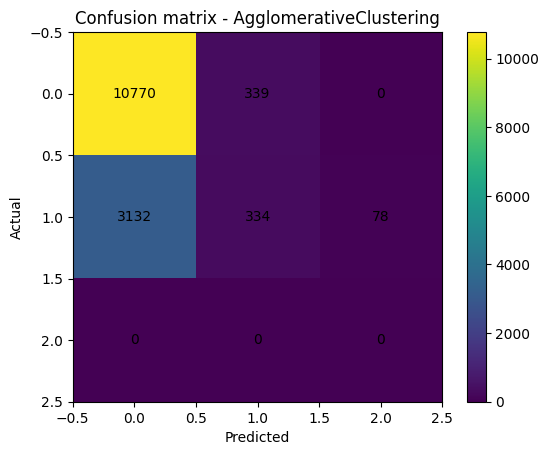

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion matrix - AgglomerativeClustering")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i,cm[i,j],ha="center",va="center")
plt.show()

In [12]:
from sklearn.decomposition import PCA

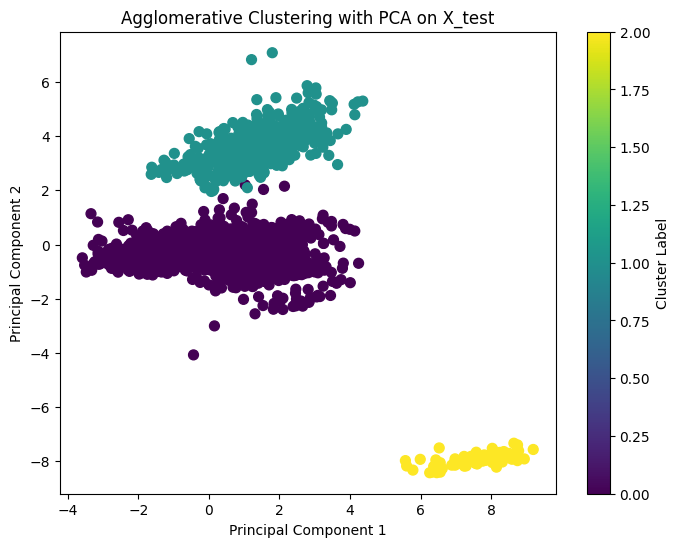

In [13]:
pca = PCA(n_components=2)  # Reducing to 2 components (2D)
X_reduced = pca.fit_transform(X_test)  # Apply PCA on test data (X_test)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis', s=50)

# Adding labels and title
plt.title('Agglomerative Clustering with PCA on X_test')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar to indicate the cluster labels
plt.colorbar(label='Cluster Label')

# Display the plot
plt.show()


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Cluster'] = agg_clustering.fit_predict(df)
print(df)



       age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
48837   39  215419             13             0             0              36   
48838   64  321403              9             0             0              40   
48839   38  374983             13             0             0              50   
48840   44   83891             13          5455             0              40   
48841   35  182148             13             0             0              60   

       income_level  Cluste

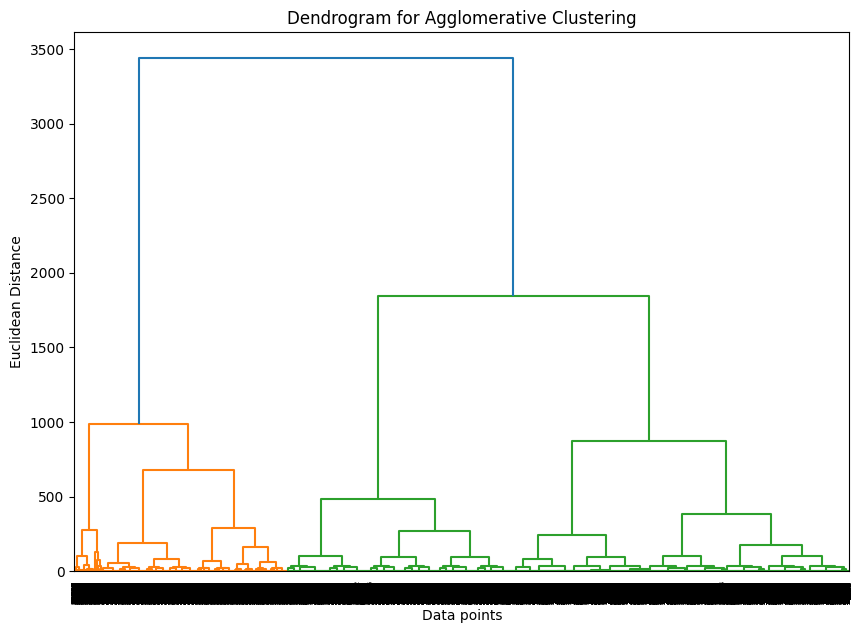

In [21]:
# Plot Dendrogram
linked = linkage(df[['income_level', 'age']], method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.show()

In [14]:
# from scipy.cluster.hierarchy import dendrogram, linkage
# Z = linkage(x, method='ward')  # 'ward' minimizes variance within clusters

# # Step 2: Plot the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(Z)

# # Add title and labels
# plt.title("Dendrogram for Agglomerative Clustering")
# plt.xlabel("Data Points")
# plt.ylabel("Euclidean Distance")

# # Show the plot
# plt.show()